[View in Colaboratory](https://colab.research.google.com/github/motacapla/TimeSeriesAnalysis-via-Prophet/blob/master/prophet-example.ipynb)

In [279]:
#以下のブログを参考にしました
#https://facebook.github.io/prophet/docs/quick_start.html
#http://data.gunosy.io/entry/change-point-detection-prophet

!pip install pandas_datareader

In [0]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import timeit

In [281]:
print(timeit.timeit('"-".join(str(n) for n in range(100))', number=10000))

start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2018, 5, 31)

brand_list = ['NVDA', 'AMD', 'GOOGL', 'SNE', 'AAPL']

0.2790566170006059


In [0]:
f = web.DataReader(brand_list, 'morningstar', start, end)

In [283]:
print(f.head())

f_u = f.unstack(0)

f_u['Close'].head()

                   Close   High    Low   Open    Volume
Symbol Date                                            
NVDA   2012-01-02  13.86  13.86  13.86  13.86         0
       2012-01-03  14.04  14.40  14.01  14.30  11703338
       2012-01-04  14.20  14.26  13.92  14.05   8684216
       2012-01-05  14.71  14.78  14.07  14.13  14089284
       2012-01-06  14.54  14.71  14.37  14.70  13341151


Symbol,AAPL,AMD,GOOGL,NVDA,SNE
Date,,,,,
2012-01-02,57.8571,5.40,323.2629,13.86,18.04
2012-01-03,58.7471,5.48,333.0274,14.04,18.38
2012-01-04,59.0629,5.46,334.4638,14.20,18.22
2012-01-05,59.7186,5.46,329.8243,14.71,17.70
2012-01-06,60.3429,5.43,325.3249,14.54,17.44


In [0]:
train_begin = '2017-07-01'
train_begin = pd.to_datetime(train_begin) #str to datetime
train_timedelta = 60 #days

train_end = train_begin +datetime.timedelta(days=train_timedelta+1)

In [285]:
print(train_begin, train_end)

2017-07-01 00:00:00 2017-08-31 00:00:00


In [0]:
df = f_u['Close']

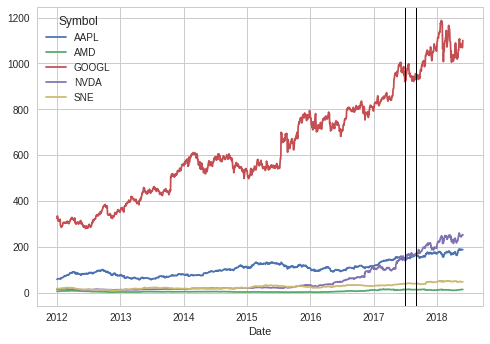

In [287]:
f_u['Close'].plot(grid=True)
plt.axvline(x=train_begin, lw=1, color='black') 
plt.axvline(x=train_end, lw=1, color='black') 

plt.show()

In [288]:
!pip install fbprophet

In [0]:
from fbprophet import Prophet

In [0]:
temp = df.loc[:, 'GOOGL'].rename('y')
temp = pd.DataFrame(temp)
temp['ds'] = temp.index

In [291]:
model = Prophet()
model.fit(temp)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.6/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [292]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
2034,2019-05-27
2035,2019-05-28
2036,2019-05-29
2037,2019-05-30
2038,2019-05-31


In [347]:
forecast = model.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast.columns

Index(['ds', 'trend', 'trend_lower', 'trend_upper', 'yhat_lower', 'yhat_upper',
       'seasonal', 'seasonal_lower', 'seasonal_upper', 'seasonalities',
       'seasonalities_lower', 'seasonalities_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper', 'yhat'],
      dtype='object')

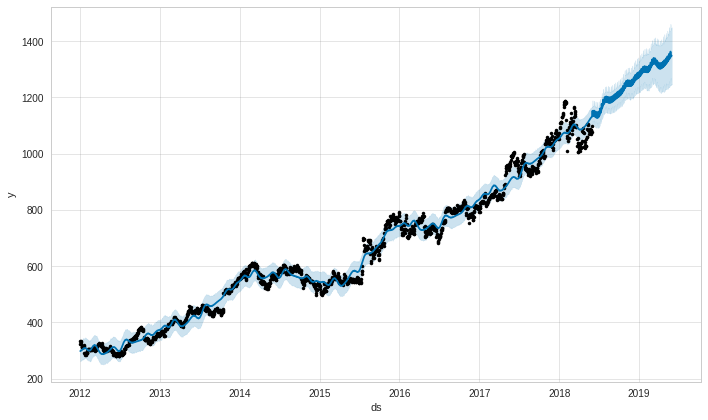

In [294]:
#forecast = model.predict(future)
model.plot(forecast);

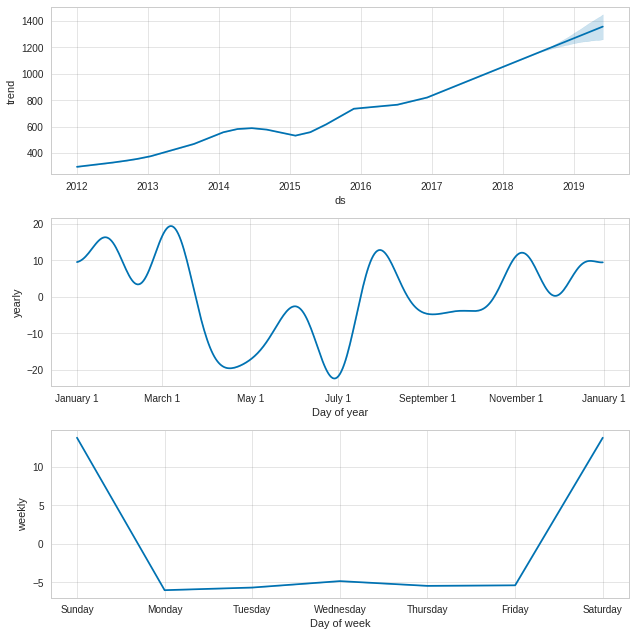

In [295]:
model.plot_components(forecast);

In [296]:
model.params['delta']

array([[-1.26115003e-07,  4.69462710e-02,  5.12849554e-02,
         1.27785668e-01,  2.53744696e-01, -8.33687290e-09,
        -5.86959941e-05,  3.48402130e-01, -4.32351416e-08,
        -4.85664262e-01, -4.94236216e-01, -4.57845354e-01,
        -3.44833098e-01,  1.16583519e-08,  1.27172976e+00,
         7.48236254e-01,  2.44874070e-01,  8.83522779e-08,
        -1.38113456e+00,  1.00335170e-07,  8.49151929e-07,
         4.26916363e-01, -2.20109026e-08,  4.77515378e-01,
        -8.12973580e-08]])

In [0]:
import seaborn as sns

#変化点情報のデータフレーム, dateを抽出
def getDateCp(temp, model):
    df_changepoints = temp.iloc[model.changepoints.index]
    df_changepoints['delta'] = model.params['delta'].ravel()

    #変化点の取得
    df_changepoints['ds'] = df_changepoints['ds'].astype(str) 
    df_changepoints['delta'] = df_changepoints['delta'].round(2)
    df_selection = df_changepoints[df_changepoints['delta'] != 0] 
    date_changepoints = df_selection['ds'].astype('datetime64[ns]').reset_index(drop=True)
    return df_changepoints, date_changepoints

In [298]:
df_changepoints, date_changepoints = getDateCp(temp, model)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


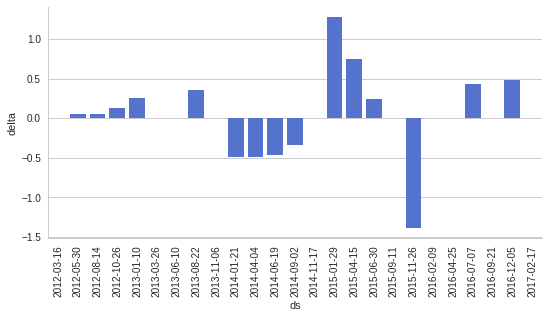

In [299]:
#変化度をplot
sns.set(style='whitegrid')
ax = sns.factorplot(x='ds', y='delta', data=df_changepoints, kind='bar', color='royalblue', size=4, aspect=2)
ax.set_xticklabels(rotation=90)

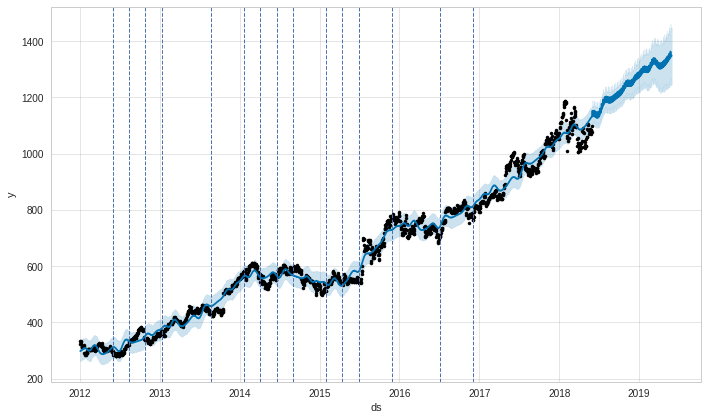

In [300]:
figure = model.plot(forecast)
for dt in date_changepoints:
    plt.axvline(dt,ls='--', lw=1)
plt.show()

In [301]:
#ケース2
#特定期間だけ抜き出す

#パラメータ
train_begin = '2012-05-01'
train_timedelta = 120 #days

#ウィンドウ幅
train_begin = pd.to_datetime(train_begin) #str to datetime
train_end = train_begin +datetime.timedelta(days=train_timedelta+1) #timedelta幅でとる

#モデル作成
model2 = Prophet()
model2.fit(temp.loc[train_begin:train_end])

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.6/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [0]:
#periods日後まで予測
periods=60
future2 = model2.make_future_dataframe(periods=periods)
forecast2 = model2.predict(future2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

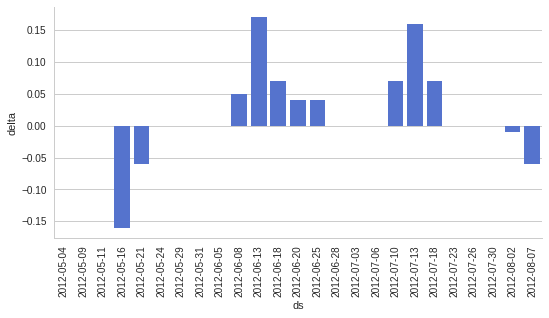

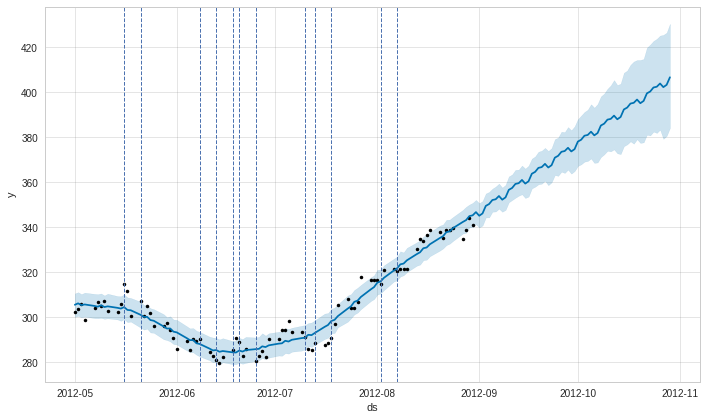

In [327]:
df_changepoints2, date_changepoints2 = getDateCp(temp.loc[train_begin:train_end], model2)

#変化度をplot
sns.set(style='whitegrid')
ax = sns.factorplot(x='ds', y='delta', data=df_changepoints2, kind='bar', color='royalblue', size=4, aspect=2)
ax.set_xticklabels(rotation=90)

model2.plot(forecast2)
for dt in date_changepoints2[date_changepoints2 <= train_end]:
  plt.axvline(dt, ls='--', lw=1)

異常度の閾値: ± 0.15
異常疑惑発見:  DatetimeIndex(['2012-05-16'], dtype='datetime64[ns]', name='Date', freq=None) 異常度 -0.16
異常疑惑発見:  DatetimeIndex(['2012-06-13'], dtype='datetime64[ns]', name='Date', freq=None) 異常度 0.17
異常疑惑発見:  DatetimeIndex(['2012-07-13'], dtype='datetime64[ns]', name='Date', freq=None) 異常度 0.16


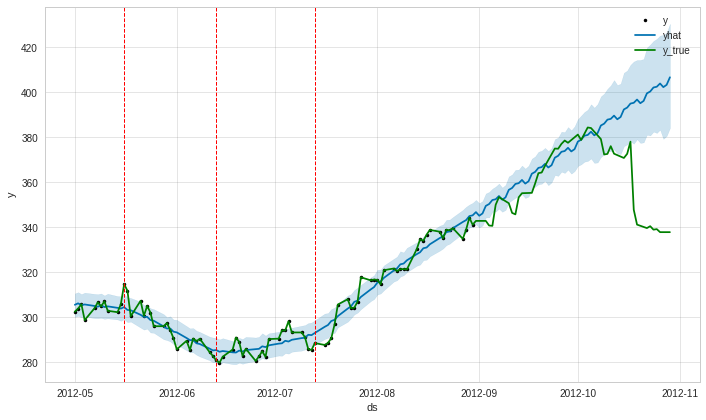

In [363]:
import math

#異常度の閾値 
alpha_threshold = 0.15

#予測モデルのtrendをplot
model2.plot(forecast2)

#真値のplot
plt.plot(temp.loc[train_begin:train_end+datetime.timedelta(days=periods)].index, temp.loc[train_begin:train_end+datetime.timedelta(days=periods)]['y'], c='g', label='y_true')
#plt.plot(temp.loc[train_end:train_end+datetime.timedelta(days=periods)].index, temp.loc[train_end:train_end+datetime.timedelta(days=periods)]['y'], c='orange', label='true val')

#print(temp.loc[train_end: train_end+datetime.timedelta(days=periods)]['y'])

#閾値確認
print("異常度の閾値: ±", alpha_threshold)

#おそい
#for idx, val in enumerate(df_changepoints2['delta']):
#    if abs(val) > abs(alpha_threshold) :
#      print("異常疑惑発見: ", df_changepoints2.index[idx],  "異常度の閾値", val)
#      dt = df_changepoints2.index[idx]
#      plt.axvline(dt, ls='--', lw=1, c='red') 

#はやい
for val in df_changepoints2['delta'][abs(df_changepoints2['delta']) > abs(alpha_threshold)]:
      print("異常疑惑発見: ", df_changepoints2.index[df_changepoints2['delta']==val],  "異常度", val)
      dt = df_changepoints2.index[df_changepoints2['delta']==val]
      plt.axvline(dt, ls='--', lw=1, c='red')    
      
plt.legend()
plt.show()